In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
import requests
import json
import gmaps
import os
import warnings

# Importing Google maps API key
from api_keys import g_key

vic_subs_path = "Data files/Vic suburb price data till 2019.csv"
vic_subs_df = pd.read_csv(vic_subs_path)

In [22]:
vic_subs_df

,Median House Price - 2019,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020,change,change,Growth PA
1,locality,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,2018-2019,2009-2019,NaN
2,ABBOTSFORD,652000,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000,-14,58,4.7
3,ABERFELDIE,786500,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500,-7,77,5.9
4,AINTREE,-,-,-,-,-,-,680500,640000,571500,580000,610000,675000,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,YARRAM,180000,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000,10,33,2.9
801,YARRAVILLE,541000,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000,-7,79,6
802,YARRAWONGA,270000,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000,9,39,3.3
803,YEA,214000,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500,11,104,7.4


In [23]:
vic_subs_df.columns = vic_subs_df.iloc[0]
vic_subs_df

,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020,change,change,Growth PA
0,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020,change,change,Growth PA
1,locality,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,2018-2019,2009-2019,NaN
2,ABBOTSFORD,652000,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000,-14,58,4.7
3,ABERFELDIE,786500,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500,-7,77,5.9
4,AINTREE,-,-,-,-,-,-,680500,640000,571500,580000,610000,675000,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,YARRAM,180000,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000,10,33,2.9
801,YARRAVILLE,541000,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000,-7,79,6
802,YARRAWONGA,270000,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000,9,39,3.3
803,YEA,214000,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500,11,104,7.4


In [24]:
vic_subs_df = vic_subs_df.iloc[:, 0:13]
vic_subs_df

,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020
0,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020
1,locality,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median
2,ABBOTSFORD,652000,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000
3,ABERFELDIE,786500,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500
4,AINTREE,-,-,-,-,-,-,680500,640000,571500,580000,610000,675000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,YARRAM,180000,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000
801,YARRAVILLE,541000,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000
802,YARRAWONGA,270000,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000
803,YEA,214000,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500


In [25]:
vic_subs_df = vic_subs_df.drop(vic_subs_df.index[[0,1]])
vic_subs_df

,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020
2,ABBOTSFORD,652000,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000
3,ABERFELDIE,786500,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500
4,AINTREE,-,-,-,-,-,-,680500,640000,571500,580000,610000,675000
5,AIREYS INLET,515000,606000,680000,634000,664000,625500,680000,715000,737500,869000,985000,1005000
6,AIRPORT WEST,456000,575000,557500,495000,532000,575000,635000,742000,845000,847500,790000,900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,YARRAM,180000,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000
801,YARRAVILLE,541000,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000
802,YARRAWONGA,270000,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000
803,YEA,214000,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500


In [26]:
vic_subs_df = vic_subs_df.reset_index(drop=True)
vic_subs_df

,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020
0,ABBOTSFORD,652000,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000
1,ABERFELDIE,786500,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500
2,AINTREE,-,-,-,-,-,-,680500,640000,571500,580000,610000,675000
3,AIREYS INLET,515000,606000,680000,634000,664000,625500,680000,715000,737500,869000,985000,1005000
4,AIRPORT WEST,456000,575000,557500,495000,532000,575000,635000,742000,845000,847500,790000,900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,180000,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000
799,YARRAVILLE,541000,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000
800,YARRAWONGA,270000,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000
801,YEA,214000,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500


In [27]:
vic_subs_df = vic_subs_df.rename(columns={np.nan: "Suburb", "prelim 2020": "2020"})
vic_subs_df

,Suburb,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABBOTSFORD,652000,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000
1,ABERFELDIE,786500,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500
2,AINTREE,-,-,-,-,-,-,680500,640000,571500,580000,610000,675000
3,AIREYS INLET,515000,606000,680000,634000,664000,625500,680000,715000,737500,869000,985000,1005000
4,AIRPORT WEST,456000,575000,557500,495000,532000,575000,635000,742000,845000,847500,790000,900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,180000,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000
799,YARRAVILLE,541000,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000
800,YARRAWONGA,270000,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000
801,YEA,214000,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500


In [28]:
del vic_subs_df["2009"]
del vic_subs_df["2010"]
vic_subs_df

,Suburb,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABBOTSFORD,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000
1,ABERFELDIE,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500
2,AINTREE,-,-,-,-,680500,640000,571500,580000,610000,675000
3,AIREYS INLET,680000,634000,664000,625500,680000,715000,737500,869000,985000,1005000
4,AIRPORT WEST,557500,495000,532000,575000,635000,742000,845000,847500,790000,900000
...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000
799,YARRAVILLE,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000
800,YARRAWONGA,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000
801,YEA,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500


In [29]:
vic_subs_df = vic_subs_df.replace("-", np.nan)
vic_subs_df

,Suburb,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABBOTSFORD,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000
1,ABERFELDIE,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500
2,AINTREE,NaN,NaN,NaN,NaN,680500,640000,571500,580000,610000,675000
3,AIREYS INLET,680000,634000,664000,625500,680000,715000,737500,869000,985000,1005000
4,AIRPORT WEST,557500,495000,532000,575000,635000,742000,845000,847500,790000,900000
...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000
799,YARRAVILLE,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000
800,YARRAWONGA,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000
801,YEA,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500


In [30]:
clean_subs_df = vic_subs_df.dropna(how='any').copy()

In [31]:
clean_subs_df["2011"] = clean_subs_df["2011"].astype(float)
clean_subs_df["2012"] = clean_subs_df["2012"].astype(float)
clean_subs_df["2013"] = clean_subs_df["2013"].astype(float)
clean_subs_df["2014"] = clean_subs_df["2014"].astype(float)
clean_subs_df["2015"] = clean_subs_df["2015"].astype(float)
clean_subs_df["2016"] = clean_subs_df["2016"].astype(float)
clean_subs_df["2017"] = clean_subs_df["2017"].astype(float)
clean_subs_df["2018"] = clean_subs_df["2018"].astype(float)
clean_subs_df["2019"] = clean_subs_df["2019"].astype(float)
clean_subs_df["2020"] = clean_subs_df["2020"].astype(float)

In [32]:
sorted_subs_df = clean_subs_df.sort_values("2020", ascending=False)
sorted_subs_df

,Suburb,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
715,TOORAK,2617500.0,2775000.0,2875000.0,3391000.0,3987500.0,4900000.0,5100000.0,4700000.0,4361000.0,4500000.0
471,MIDDLE PARK,1345000.0,1420500.0,1587500.0,2125000.0,2317000.0,2238500.0,2370000.0,2650000.0,2705000.0,3555000.0
100,BRIGHTON,1720000.0,1789500.0,1802500.0,1940000.0,2302500.0,2740000.0,3050000.0,2879000.0,2600000.0,2825000.0
321,HAWTHORN,1330000.0,1405000.0,1575000.0,1606500.0,1916500.0,2240000.0,2650000.0,2488000.0,2195500.0,2578000.0
583,PORTSEA,1625000.0,1398000.0,1195000.0,1305000.0,1800000.0,1701000.0,1925000.0,2180000.0,1950000.0,2515000.0
...,...,...,...,...,...,...,...,...,...,...,...
527,NHILL,107000.0,110000.0,110000.0,125000.0,128000.0,140000.0,126500.0,149000.0,137000.0,107500.0
476,MINYIP,82500.0,81000.0,73500.0,95000.0,93000.0,82500.0,94000.0,81000.0,114500.0,95000.0
359,JEPARIT,101500.0,59000.0,80500.0,63000.0,89000.0,124000.0,66500.0,77000.0,81000.0,88000.0
72,BEULAH,69000.0,75000.0,42500.0,101000.0,65000.0,65000.0,96000.0,120500.0,77000.0,81000.0


In [33]:
condensed_subs = sorted_subs_df.loc[:, ["Suburb", "2011", "2015", "2019", "2020"]]
condensed_subs

,Suburb,2011,2015,2019,2020
715,TOORAK,2617500.0,3987500.0,4361000.0,4500000.0
471,MIDDLE PARK,1345000.0,2317000.0,2705000.0,3555000.0
100,BRIGHTON,1720000.0,2302500.0,2600000.0,2825000.0
321,HAWTHORN,1330000.0,1916500.0,2195500.0,2578000.0
583,PORTSEA,1625000.0,1800000.0,1950000.0,2515000.0
...,...,...,...,...,...
527,NHILL,107000.0,128000.0,137000.0,107500.0
476,MINYIP,82500.0,93000.0,114500.0,95000.0
359,JEPARIT,101500.0,89000.0,81000.0,88000.0
72,BEULAH,69000.0,65000.0,77000.0,81000.0


In [34]:
heat_subs = condensed_subs.copy()

In [35]:
heat_subs["Lat"] = ""
heat_subs["Lng"] = ""
heat_subs

,Suburb,2011,2015,2019,2020,Lat,Lng
715,TOORAK,2617500.0,3987500.0,4361000.0,4500000.0,,
471,MIDDLE PARK,1345000.0,2317000.0,2705000.0,3555000.0,,
100,BRIGHTON,1720000.0,2302500.0,2600000.0,2825000.0,,
321,HAWTHORN,1330000.0,1916500.0,2195500.0,2578000.0,,
583,PORTSEA,1625000.0,1800000.0,1950000.0,2515000.0,,
...,...,...,...,...,...,...,...
527,NHILL,107000.0,128000.0,137000.0,107500.0,,
476,MINYIP,82500.0,93000.0,114500.0,95000.0,,
359,JEPARIT,101500.0,89000.0,81000.0,88000.0,,
72,BEULAH,69000.0,65000.0,77000.0,81000.0,,


In [36]:
heat_subs_params = {"key": g_key}

for index, row in heat_top_subs.iterrows():
    
    base_url = "https://maps.googleapis.com/maps/api/geocode/json?"
    
    suburb = row["Suburb"]
    
    heat_subs_params["address"] = f"{suburb}, Vic"
    
    heat_subs_lat_lng = requests.get(base_url, params=heat_subs_params)
    
    heat_subs_lat_lng = heat_subs_lat_lng.json()
    
    try:
        heat_subs.loc[index, "Lat"] = heat_subs_lat_lng["results"][0]["geometry"]["location"]["lat"]
        heat_subs.loc[index, "Lng"] = heat_subs_lat_lng["results"][0]["geometry"]["location"]["lng"]
    
    except:
        heat_subs.loc[index, "Lat"] = np.nan
        heat_subs.loc[index, "Lng"] = np.nan

In [37]:
heat_subs.isnull().values.any()

False

In [38]:
heat_subs

,Suburb,2011,2015,2019,2020,Lat,Lng
715,TOORAK,2617500.0,3987500.0,4361000.0,4500000.0,-37.8417,145.014
471,MIDDLE PARK,1345000.0,2317000.0,2705000.0,3555000.0,-37.8519,144.963
100,BRIGHTON,1720000.0,2302500.0,2600000.0,2825000.0,-37.9043,144.993
321,HAWTHORN,1330000.0,1916500.0,2195500.0,2578000.0,-37.8226,145.035
583,PORTSEA,1625000.0,1800000.0,1950000.0,2515000.0,-38.32,144.713
...,...,...,...,...,...,...,...
527,NHILL,107000.0,128000.0,137000.0,107500.0,-36.3328,141.65
476,MINYIP,82500.0,93000.0,114500.0,95000.0,-36.4577,142.594
359,JEPARIT,101500.0,89000.0,81000.0,88000.0,-36.1331,141.944
72,BEULAH,69000.0,65000.0,77000.0,81000.0,-35.9381,142.42


In [39]:
top_subs = heat_subs.head(5).copy()
top_subs 

,Suburb,2011,2015,2019,2020,Lat,Lng
715,TOORAK,2617500.0,3987500.0,4361000.0,4500000.0,-37.8417,145.014
471,MIDDLE PARK,1345000.0,2317000.0,2705000.0,3555000.0,-37.8519,144.963
100,BRIGHTON,1720000.0,2302500.0,2600000.0,2825000.0,-37.9043,144.993
321,HAWTHORN,1330000.0,1916500.0,2195500.0,2578000.0,-37.8226,145.035
583,PORTSEA,1625000.0,1800000.0,1950000.0,2515000.0,-38.32,144.713


In [40]:
bottom_subs = heat_subs.tail(5).copy()
bottom_subs 

,Suburb,2011,2015,2019,2020,Lat,Lng
527,NHILL,107000.0,128000.0,137000.0,107500.0,-36.3328,141.65
476,MINYIP,82500.0,93000.0,114500.0,95000.0,-36.4577,142.594
359,JEPARIT,101500.0,89000.0,81000.0,88000.0,-36.1331,141.944
72,BEULAH,69000.0,65000.0,77000.0,81000.0,-35.9381,142.42
590,RAINBOW,71500.0,68000.0,75000.0,77500.0,-35.9008,141.997


In [43]:
top_markers = top_subs[["Lat", "Lng"]]
low_markers = bottom_subs[["Lat", "Lng"]]
gmaps.configure(api_key=g_key)

In [53]:
locations = heat_subs[["Lat", "Lng"]]

price = heat_subs["2020"]/100000

fig = gmaps.figure(zoom_level=8, center=(-38, 145))

top_price_layer = gmaps.symbol_layer(top_markers, fill_color='green', stroke_color='blue', scale=3)
low_price_layer = gmaps.symbol_layer(low_markers, fill_color='purple', stroke_color='purple', scale=3)

heat_layer = gmaps.heatmap_layer(locations, weights=price, dissipating=False, max_intensity=10, point_radius=0.05)
fig.add_layer(heat_layer)
fig.add_layer(top_price_layer)
fig.add_layer(low_price_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [54]:
locations = heat_subs[["Lat", "Lng"]]

price = heat_subs["2015"]/100000

fig = gmaps.figure(zoom_level=8, center=(-38, 145))

heat_layer = gmaps.heatmap_layer(locations, weights=price, dissipating=False, max_intensity=10, point_radius=0.05)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [56]:
locations = heat_subs[["Lat", "Lng"]]

price = heat_subs["2011"]/100000

fig = gmaps.figure(zoom_level=8, center=(-38, 145))

heat_layer = gmaps.heatmap_layer(locations, weights=price, dissipating=False, max_intensity=10, point_radius=0.05)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [84]:
price_list = []


price_data = heat_subs["2011"]/1000
quartiles = price_data.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round(upperq-lowerq, 2)
    
price_list.append(price_data)
    
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

outlier = heat_subs.loc[((heat_subs["2011"]/1000) < lower_bound) | ((heat_subs["2011"]/1000) > upper_bound)]
    
outlier_value = outlier["2011"].tolist()

    
    

In [89]:
len(outlier_value)

35

In [113]:
years = ["2011", "2015", "2020"]

price_list = []
data_frame = []

for year in years:
    price_data = (heat_subs[year] / 1000)
    quartiles = price_data.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq-lowerq, 2)
    
    price_list.append(price_data)
    
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

    outlier = heat_subs.loc[((heat_subs[year]/1000) < lower_bound) | ((heat_subs[year]/1000) > upper_bound)]
    
    outlier_value = outlier[year].tolist()
    outlier_count = len(outlier_value)
       
    print(f"{year} Summary:")
    print(f"The lower quartile of {year} is: {lowerq}")
    print(f"The upper quartile of {year} is: {upperq}")
    print(f"The interquartile range of {year} is: {iqr}")
    print(f"The median of {year} is: {quartiles[0.5]} ")
    print(f"The year {year} has {outlier_count} outliers.")
    
    print("--------------------------------------------------")
    
    data_frame.append({"Year": year, "Lower Qrt": lowerq, "Upper Qrt": upperq, "IQR": iqr, "Median": quartiles[0.5],
                       "No. of Outliers": outlier_count})
    
    stats_df = pd.DataFrame(data_frame)                    

2011 Summary:
The lower quartile of 2011 is: 267.5
The upper quartile of 2011 is: 568.0
The interquartile range of 2011 is: 300.5
The median of 2011 is: 380.0 
The year 2011 has 35 outliers.
--------------------------------------------------
2015 Summary:
The lower quartile of 2015 is: 295.0
The upper quartile of 2015 is: 697.0
The interquartile range of 2015 is: 402.0
The median of 2015 is: 423.5 
The year 2015 has 43 outliers.
--------------------------------------------------
2020 Summary:
The lower quartile of 2020 is: 407.0
The upper quartile of 2020 is: 921.0
The interquartile range of 2020 is: 514.0
The median of 2020 is: 600.0 
The year 2020 has 37 outliers.
--------------------------------------------------


In [115]:
stats_df

,Year,Lower Qrt,Upper Qrt,IQR,Median,No. of Outliers
0,2011,267.5,568.0,300.5,380.0,35
1,2015,295.0,697.0,402.0,423.5,43
2,2020,407.0,921.0,514.0,600.0,37


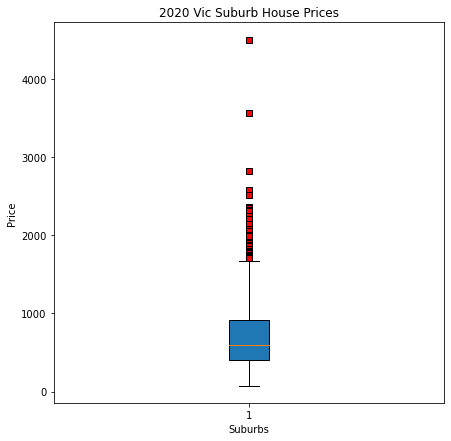

In [116]:
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.set_title("Vic Suburb House Prices")
ax1.set_ylabel("Price")
plt.xlabel("Suburbs")
plt.locator_params(axis="y", nbins=8)
plt.ylim()

# Formatting is applied to any outliers in the data. 
red_square = dict(markerfacecolor='r', marker='s')

# Generating the graph using the tumor_vol list from the previous For Loop and the Treatment list for the labels.
ax1.boxplot(price_list, labels=(years), widths = 0.1, flierprops=red_square, patch_artist=True);

# Display the boxplot.
plt.show()

In [34]:
subs_df = clean_subs_df.copy()
subs_df

,Suburb,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABBOTSFORD,730000.0,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1030000.0,1150000.0
1,ABERFELDIE,994000.0,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1453000.0,1500000.0,1390000.0,1592500.0
3,AIREYS INLET,680000.0,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1005000.0
4,AIRPORT WEST,557500.0,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,847500.0,790000.0,900000.0
5,ALBANVALE,317000.0,310000.0,313000.0,326500.0,345000.0,439000.0,526500.0,546000.0,512000.0,563000.0
...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,195500.0,215000.0,190000.0,202500.0,245000.0,230000.0,225000.0,218000.0,240000.0,260000.0
799,YARRAVILLE,607000.0,613000.0,696000.0,710000.0,810000.0,900500.0,1000000.0,1045000.0,971000.0,950000.0
800,YARRAWONGA,270000.0,300000.0,302500.0,297000.0,300500.0,320000.0,324500.0,345000.0,375000.0,398000.0
801,YEA,270000.0,255000.0,260000.0,255000.0,260000.0,305000.0,386500.0,392500.0,435500.0,416500.0


In [35]:
subs_df["Postcode"] = ""
subs_df

,Suburb,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Postcode
0,ABBOTSFORD,730000.0,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1030000.0,1150000.0,
1,ABERFELDIE,994000.0,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1453000.0,1500000.0,1390000.0,1592500.0,
3,AIREYS INLET,680000.0,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1005000.0,
4,AIRPORT WEST,557500.0,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,847500.0,790000.0,900000.0,
5,ALBANVALE,317000.0,310000.0,313000.0,326500.0,345000.0,439000.0,526500.0,546000.0,512000.0,563000.0,
...,...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,195500.0,215000.0,190000.0,202500.0,245000.0,230000.0,225000.0,218000.0,240000.0,260000.0,
799,YARRAVILLE,607000.0,613000.0,696000.0,710000.0,810000.0,900500.0,1000000.0,1045000.0,971000.0,950000.0,
800,YARRAWONGA,270000.0,300000.0,302500.0,297000.0,300500.0,320000.0,324500.0,345000.0,375000.0,398000.0,
801,YEA,270000.0,255000.0,260000.0,255000.0,260000.0,305000.0,386500.0,392500.0,435500.0,416500.0,


In [37]:
new_params = {"key": g_key}

for index, row in subs_df.iterrows():
    
    base_url = "https://maps.googleapis.com/maps/api/geocode/json?"
    
    suburb = row["Suburb"]
    
    new_params["address"] = f"{suburb}, Vic"
    
    subs_postcode = requests.get(base_url, params=new_params)
    
    subs_postcode = subs_postcode.json()
    
    try:
        subs_df.loc[index, "Postcode"] = subs_postcode["results"][0]["address_components"][4]["long_name"]
    
    except:
        subs_df.loc[index, "Postcode"] = np.nan

In [38]:
subs_df

,Suburb,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Postcode
0,ABBOTSFORD,730000.0,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1030000.0,1150000.0,3067
1,ABERFELDIE,994000.0,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1453000.0,1500000.0,1390000.0,1592500.0,3040
3,AIREYS INLET,680000.0,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1005000.0,3231
4,AIRPORT WEST,557500.0,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,847500.0,790000.0,900000.0,3042
5,ALBANVALE,317000.0,310000.0,313000.0,326500.0,345000.0,439000.0,526500.0,546000.0,512000.0,563000.0,3021
...,...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,195500.0,215000.0,190000.0,202500.0,245000.0,230000.0,225000.0,218000.0,240000.0,260000.0,3971
799,YARRAVILLE,607000.0,613000.0,696000.0,710000.0,810000.0,900500.0,1000000.0,1045000.0,971000.0,950000.0,3013
800,YARRAWONGA,270000.0,300000.0,302500.0,297000.0,300500.0,320000.0,324500.0,345000.0,375000.0,398000.0,3730
801,YEA,270000.0,255000.0,260000.0,255000.0,260000.0,305000.0,386500.0,392500.0,435500.0,416500.0,3717


In [39]:
all_post_df = subs_df.dropna().copy()
all_post_df

,Suburb,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Postcode
0,ABBOTSFORD,730000.0,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1030000.0,1150000.0,3067
1,ABERFELDIE,994000.0,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1453000.0,1500000.0,1390000.0,1592500.0,3040
3,AIREYS INLET,680000.0,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1005000.0,3231
4,AIRPORT WEST,557500.0,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,847500.0,790000.0,900000.0,3042
5,ALBANVALE,317000.0,310000.0,313000.0,326500.0,345000.0,439000.0,526500.0,546000.0,512000.0,563000.0,3021
...,...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,195500.0,215000.0,190000.0,202500.0,245000.0,230000.0,225000.0,218000.0,240000.0,260000.0,3971
799,YARRAVILLE,607000.0,613000.0,696000.0,710000.0,810000.0,900500.0,1000000.0,1045000.0,971000.0,950000.0,3013
800,YARRAWONGA,270000.0,300000.0,302500.0,297000.0,300500.0,320000.0,324500.0,345000.0,375000.0,398000.0,3730
801,YEA,270000.0,255000.0,260000.0,255000.0,260000.0,305000.0,386500.0,392500.0,435500.0,416500.0,3717


In [ ]:
all_post_df.to_csv("Data files/prices with postcode.csv", encoding="utf-8", index=False, header=True)

In [41]:
# To avoid using the google maps API again to get the Lat and Lng for each suburb, 
# I used the data gathered earlier and saved it to csv. 
# This will be merged with the "prices with postcode file" & income file.
subs_loc = heat_subs[["Suburb", "Lat", "Lng"]]

In [42]:
subs_loc.to_csv("Data files/subs lat and lng.csv", encoding="utf-8", index=False, header=True)